## Case: Build machine learning models for prediction Regression Task
## Dataset: House_Price_prediction.csv

## Problem Statement: Analyse the dataset and perform the steps below to build linear regression machine
learning model

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#Import Dataset

In [3]:
m1=pd.read_csv("House_Price_prediction.csv")
print(m1)

     Unnamed: 0   price   lotsize  bedrooms  bathrms  stories  garagepl  \
0             0   42000  8.674197         3        1        2         1   
1             1   38500  8.294050         2        1        1         0   
2             2   49500  8.026170         3        1        1         0   
3             3   60500  8.802372         3        1        2         0   
4             4   61000  8.757784         3        1        1         0   
..          ...     ...       ...       ...      ...      ...       ...   
546         546  107500  8.699515         3        2        4         1   
547         547  108000  8.699515         3        2        3         0   
548         548  113750  8.699515         3        1        4         2   
549         549  120000  8.853665         3        1        4         2   
550         550   70000  9.464983         3        1        1         2   

     driveway_yes  recroom_yes  fullbase_yes  gashw_yes  airco_yes  \
0               1            

In [4]:
#Exploratory Data Analysis(EDA)

In [5]:
m1.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0,42000,8.674197,3,1,2,1,1,0,1,0,0,0
1,1,38500,8.294050,2,1,1,0,1,0,0,0,0,0
2,2,49500,8.026170,3,1,1,0,1,0,0,0,0,0
3,3,60500,8.802372,3,1,2,0,1,1,0,0,0,0
4,4,61000,8.757784,3,1,1,0,1,0,0,0,0,0


In [6]:
m1.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,275.000000,68445.811252,8.470413,2.967332,1.286751,1.820327,0.698730,0.860254,0.177858,0.346642,0.045372,0.321234,0.232305
std,159.204271,26848.486040,0.399086,0.732880,0.502165,0.881334,0.863386,0.347038,0.382741,0.476333,0.208308,0.467375,0.422686
min,0.000000,25000.000000,7.408531,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.500000,49500.000000,8.188689,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275.000000,62500.000000,8.433812,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,412.500000,82950.000000,8.757784,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,550.000000,190000.000000,9.692767,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    551 non-null    int64  
 1   price         551 non-null    int64  
 2   lotsize       551 non-null    float64
 3   bedrooms      551 non-null    int64  
 4   bathrms       551 non-null    int64  
 5   stories       551 non-null    int64  
 6   garagepl      551 non-null    int64  
 7   driveway_yes  551 non-null    int64  
 8   recroom_yes   551 non-null    int64  
 9   fullbase_yes  551 non-null    int64  
 10  gashw_yes     551 non-null    int64  
 11  airco_yes     551 non-null    int64  
 12  prefarea_yes  551 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 56.1 KB


In [8]:
print(m1.shape)

(551, 13)


In [9]:
m1.corr()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
Unnamed: 0,1.000000,0.387924,0.386297,0.109361,0.109914,0.248420,0.135595,0.315854,0.095841,-0.013450,-0.036458,0.169776,0.503575
price,0.387924,1.000000,0.560017,0.363247,0.513014,0.435332,0.385734,0.298859,0.253611,0.175110,0.089257,0.462458,0.318696
lotsize,0.386297,0.560017,1.000000,0.151814,0.198791,0.112181,0.365816,0.332750,0.176168,0.035777,-0.015737,0.262216,0.212355
bedrooms,0.109361,0.363247,0.151814,1.000000,0.371325,0.399058,0.136709,-0.010833,0.079088,0.094997,0.045456,0.158087,0.077366
bathrms,0.109914,0.513014,0.198791,0.371325,1.000000,0.322034,0.170263,0.042566,0.122017,0.100567,0.066592,0.187823,0.062495
stories,0.248420,0.435332,0.112181,0.399058,0.322034,1.000000,0.052983,0.125817,0.046397,-0.180526,0.014774,0.312520,0.034156
garagepl,0.135595,0.385734,0.365816,0.136709,0.170263,0.052983,1.000000,0.205116,0.041400,0.046609,0.066032,0.159165,0.087499
driveway_yes,0.315854,0.298859,0.332750,-0.010833,0.042566,0.125817,0.205116,1.000000,0.091646,0.040602,-0.012735,0.109127,0.196923
recroom_yes,0.095841,0.253611,0.176168,0.079088,0.122017,0.046397,0.041400,0.091646,1.000000,0.369287,-0.010181,0.137408,0.159972
fullbase_yes,-0.013450,0.175110,0.035777,0.094997,0.100567,-0.180526,0.046609,0.040602,0.369287,1.000000,0.006119,0.037930,0.231448


#Splitting Data into Training and Testing Dataset

In [10]:
x=m1[['price','lotsize','bedrooms','bathrms','stories','garagepl','driveway_yes','recroom_yes','fullbase_yes','gashw_yes','airco_yes']]#independant variables

In [11]:
y=m1.prefarea_yes #dependant variable

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1 )

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(440, 11)
(111, 11)
(440,)
(111,)


In [14]:
print(x_train)
print(y_train)

      price   lotsize  bedrooms  bathrms  stories  garagepl  driveway_yes  \
92   163000  8.911934         4        1        2         2             1   
66    60000  8.525161         3        1        2         0             1   
201   53900  7.832014         5        2        1         1             0   
397   80750  8.803875         4        2        2         1             1   
521  105000  8.699515         4        2        4         1             1   
..      ...       ...       ...      ...      ...       ...           ...   
129  127000  8.433812         3        2        2         2             1   
144   57250  8.411833         3        1        2         0             0   
72    32500  7.515345         2        1        1         0             0   
235   42500  8.378391         4        1        2         1             0   
37    67000  8.550628         3        1        4         0             1   

     recroom_yes  fullbase_yes  gashw_yes  airco_yes  
92             1    

In [15]:
# Model buiding | model training


In [16]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train) # Model buiding | model training

#X_TRAIN =440 rows x 11 columns 
#Y_TRAIN= 440 RECORDS, 1 COLUMNS 

LinearRegression()

In [17]:
print(linreg.intercept_) 

-0.545539630293612


In [18]:
print(linreg.coef_) # Next we try to obtain a1,a2,.....a11 and also b

[ 4.86545317e-06  5.36246111e-02  1.57066101e-03 -8.32654349e-02
 -2.47227400e-02 -3.36147082e-02  9.81946453e-02  5.34496848e-02
  1.53422486e-01 -1.91696418e-01  2.89096643e-02]


In [19]:
print("x_test:(price, lotsize','bedrooms','bathrms','stories','garagepl','driveway_yes','recroom_yes','fullbase_yes','gashw_yes','airco_yes)")
print(x_test)

#Sales=0.0468431 X TV + 0.17854434  X Radio + 0.00258619 X Newspaper + 2.9079470208164313
print("y_test: (prefarea_yes-->actual values)")
print(y_test)

x_test:(price, lotsize','bedrooms','bathrms','stories','garagepl','driveway_yes','recroom_yes','fullbase_yes','gashw_yes','airco_yes)
     price   lotsize  bedrooms  bathrms  stories  garagepl  driveway_yes  \
160  63900  8.058960         3        1        2         1             1   
306  67000  9.176473         4        2        2         1             1   
65   60000  8.612503         3        1        2         0             1   
423  62900  7.965546         3        1        2         0             1   
135  90000  8.699515         4        2        4         1             1   
..     ...       ...       ...      ...      ...       ...           ...   
408  89000  8.794825         3        2        1         0             1   
17   40750  8.556414         4        1        3         0             1   
247  42000  8.797095         3        1        2         0             1   
124  70000  8.323608         2        1        1         1             1   
257  75500  8.433812         2

In [20]:
# Making predictions using the built model on test dataset

In [21]:
y_pred=linreg.predict(x_test)  #x_test-->- 111 records ,(actual values) y_test-->sales

In [22]:
print(y_pred)

[ 0.16301209  0.33428895  0.20733508  0.15784237  0.1643      0.38864294
  0.3769083   0.0515332   0.22644814  0.34188307  0.0496893   0.18451213
 -0.06550692  0.2897895   0.16202616  0.04709468  0.27923778  0.22507599
  0.12653864  0.38901906  0.21396333  0.2833614   0.22425638  0.26118611
  0.48653114  0.22415522  0.42025623  0.66789153  0.32314802  0.23312456
 -0.09947451  0.44921925  0.24414098  0.2421242   0.14290019  0.15230468
 -0.15590387  0.02693835  0.05212203  0.39888901  0.25175938  0.17481732
  0.3946586  -0.039609   -0.03340065 -0.010992    0.06631354  0.22592543
  0.47371444  0.35196897  0.03637799  0.35767401  0.37024095  0.18951081
  0.1341406   0.21810362  0.07814129  0.36179345  0.53737528  0.17067184
  0.49532839  0.20492066  0.11088533  0.42204509 -0.02635494  0.05905336
  0.22814137  0.12661147  0.134337    0.05050866 -0.04168664 -0.0258426
  0.32222521  0.18876281  0.41483327  0.33644101  0.13880515 -0.00972749
  0.17393439  0.24448947  0.0267609   0.27678444  0.

In [23]:
print(y_test)

160    0
306    0
65     0
423    1
135    0
      ..
408    1
17     0
247    0
124    0
257    0
Name: prefarea_yes, Length: 111, dtype: int64


In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()  # This is an object of the LinearRegression Class
lr.fit(x_train,y_train) # This trains our model with the 440 training records

LinearRegression()

In [25]:
print(lr.intercept_)
print(lr.coef_)

-0.545539630293612
[ 4.86545317e-06  5.36246111e-02  1.57066101e-03 -8.32654349e-02
 -2.47227400e-02 -3.36147082e-02  9.81946453e-02  5.34496848e-02
  1.53422486e-01 -1.91696418e-01  2.89096643e-02]


In [26]:
y_pred=lr.predict(x_test)

In [27]:
print(y_pred)

[ 0.16301209  0.33428895  0.20733508  0.15784237  0.1643      0.38864294
  0.3769083   0.0515332   0.22644814  0.34188307  0.0496893   0.18451213
 -0.06550692  0.2897895   0.16202616  0.04709468  0.27923778  0.22507599
  0.12653864  0.38901906  0.21396333  0.2833614   0.22425638  0.26118611
  0.48653114  0.22415522  0.42025623  0.66789153  0.32314802  0.23312456
 -0.09947451  0.44921925  0.24414098  0.2421242   0.14290019  0.15230468
 -0.15590387  0.02693835  0.05212203  0.39888901  0.25175938  0.17481732
  0.3946586  -0.039609   -0.03340065 -0.010992    0.06631354  0.22592543
  0.47371444  0.35196897  0.03637799  0.35767401  0.37024095  0.18951081
  0.1341406   0.21810362  0.07814129  0.36179345  0.53737528  0.17067184
  0.49532839  0.20492066  0.11088533  0.42204509 -0.02635494  0.05905336
  0.22814137  0.12661147  0.134337    0.05050866 -0.04168664 -0.0258426
  0.32222521  0.18876281  0.41483327  0.33644101  0.13880515 -0.00972749
  0.17393439  0.24448947  0.0267609   0.27678444  0.

In [28]:
# Next we compare our results to see how our model has perfomed
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference +/-':y_test-y_pred})
print(df)

     Actual  Predicted  Difference +/-
160       0   0.163012       -0.163012
306       0   0.334289       -0.334289
65        0   0.207335       -0.207335
423       1   0.157842        0.842158
135       0   0.164300       -0.164300
..      ...        ...             ...
408       1   0.453090        0.546910
17        0   0.058606       -0.058606
247       0   0.100746       -0.100746
124       0   0.354548       -0.354548
257       0   0.145825       -0.145825

[111 rows x 3 columns]


In [29]:
y_train_pred=lr.predict(x_train)
print(y_train_pred)

[ 8.65747042e-01  3.56073886e-01  1.02014147e-01  3.81208476e-01
  3.19641148e-01  3.42863991e-01  1.15236254e-01  9.82600418e-02
  5.79238925e-02  8.65685027e-02  2.61279992e-01  2.71129466e-01
  1.23105851e-01  1.65350483e-01 -7.56530984e-02  6.97223258e-02
  2.76784436e-01  7.73194520e-02  5.57535647e-01  2.99946982e-01
  3.76226573e-01  2.27994357e-01  9.02836738e-02  4.78182688e-01
  5.96232768e-01  1.51108519e-01  7.25765979e-02  1.79387983e-02
  1.91356728e-01  1.49657903e-01  4.40436942e-01  3.17879233e-01
  1.28373746e-01  8.34867444e-02  1.91835450e-01 -7.26518143e-02
  2.87217730e-01  3.37554610e-01  9.68046337e-02  4.72558285e-02
  2.67143520e-01  2.15906004e-01 -5.29296831e-02  3.63109600e-01
  3.33272127e-01  2.30367818e-01  2.33856988e-01  3.56236912e-01
  5.50516843e-01  1.61235181e-01  1.02015921e-01  5.45812354e-01
  1.95100129e-01  7.29711075e-01  3.86136476e-01  3.62594997e-01
  4.10293929e-01  3.28149015e-01  1.44728240e-01 -2.08542858e-02
  2.55592351e-02  4.51038

In [30]:
# Now we evaluate our model
import sklearn.metrics as metrics
print("For Testing dataset:")
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R SCORE:',metrics.r2_score(y_test,y_pred))

For Testing dataset:
RMSE: 0.4368626501051918
R SCORE: 0.051834588033688456


In [31]:
print("For Training dataset:")
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('R SCORE:',metrics.r2_score(y_train,y_train_pred))

For Training dataset:
RMSE: 0.3731035920024518
R SCORE: 0.189975119031903


In [32]:
# Model Bias is =0.4368626501051918- 0.3731035920024518 = 0.0637
#  Model Variance is = 0.189975119031903-0.051834588033688456  = 0.13807
# 10% of STD = 0.1*26848.49 = 2684.85
# This Shows that our model has performed very well due to it's low bias and low varience.

## .2 GRIDSEARCHCV FOR LINEAR REGRESSION

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()
x = st_x.fit_transform(x)

In [35]:
parameters = {'fit_intercept':[True,False],'positive':[True,False]}        
gscv = LinearRegression()  
grid = GridSearchCV(gscv, parameters, cv=5)
grid.fit(x,y)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'fit_intercept': True, 'positive': True}
LinearRegression(positive=True)
-0.463653852128387


### 3. BUILDING A MACHINE LEARNING MODEL FOR PREDICTING CANCER IN PATIENTS DATA SET

In [36]:
# Importing The Cancer Dataset
d2=pd.read_csv('cancer-data-2.csv')
print(d2)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

In [37]:
d2.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
d2.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [39]:
# Indicate the dependent(x) and independent(y) variables
x=d2.iloc[:,1:]
y=d2.iloc[:,0]

In [40]:
# Verify x and y
print(x)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [41]:
#split the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)


In [42]:
# displaying the training datasets
print('X TRAIN:\n',x_train)
print('\nY TRAIN:\n',y_train)

X TRAIN:
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
60         10.17         14.88           64.55      311.9          0.11340   
3          11.42         20.38           77.58      386.1          0.14250   
426        10.48         14.98           67.49      333.6          0.09816   
204        12.47         18.60           81.09      481.9          0.09965   
430        14.90         22.53          102.10      685.0          0.09947   
..           ...           ...             ...        ...              ...   
299        10.51         23.09           66.85      334.2          0.10150   
534        10.96         17.62           70.79      365.6          0.09687   
493        12.46         12.83           78.83      477.3          0.07372   
527        12.34         12.27           78.94      468.5          0.09003   
168        17.47         24.68          116.10      984.6          0.10490   

     compactness_mean  concavity_mean  concave points

In [43]:
#datasets shape
print('X:\n',x_train.shape)
print('Y:\n',y_train.shape)

X:
 (512, 30)
Y:
 (512,)


In [44]:
# Display testing datasets
print('X:\n',x_test)
print('Y:\n',y_test)

X:
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
528       13.940         13.17           90.31      594.2          0.12480   
291       14.960         19.10           97.03      687.3          0.08992   
467        9.668         18.10           61.06      286.3          0.08311   
108       22.270         19.67          152.80     1509.0          0.13260   
340       14.420         16.54           94.15      641.2          0.09751   
256       19.550         28.77          133.60     1207.0          0.09260   
160       11.750         20.18           76.10      419.8          0.10890   
306       13.200         15.82           84.07      537.3          0.08511   
155       12.250         17.94           78.27      460.3          0.08654   
511       14.810         14.70           94.66      680.7          0.08472   
171       13.430         19.63           85.84      565.4          0.09048   
109       11.340         21.26           72.48      396.5   

In [45]:
#scaing our data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  # Object of StandardScaler Class
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [46]:
# Now we train our model to learn the datasets
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train_scaled,y_train) # Model is trained with the 512 training records

LogisticRegression()

In [47]:
# Then we test our model
y_pred=lgr.predict(x_test_scaled)
print( y_pred)

[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0]


In [48]:
# We compare the Actual value to the predicted values
dfm=pd.DataFrame({'Actual':y_test,'Predicted':y_pred, 'Difference':y_test-y_pred})
print(dfm)

     Actual  Predicted  Difference
528       0          0           0
291       0          0           0
467       0          0           0
108       1          1           0
340       0          0           0
256       1          1           0
160       0          0           0
306       0          0           0
155       0          0           0
511       0          0           0
171       1          1           0
109       0          0           0
275       0          0           0
200       0          0           0
55        0          0           0
161       1          1           0
67        0          0           0
540       0          0           0
281       0          0           0
72        1          1           0
152       0          0           0
304       0          0           0
246       0          0           0
294       0          0           0
453       0          0           0
517       1          1           0
544       0          0           0
500       0         

In [49]:
# Observating the differences where the data is not zero, the prediction was WRONG
# Therefore our prediction looks near accurate

In [50]:
# our regression equation we looks like
print(lgr.intercept_)  # Gives the value of 'b'
print(lgr.coef_)  # Gives the 30 coefficients of the regression equation

[-0.15791469]
[[ 0.51563131  0.35322049  0.48347474  0.56198034  0.2312156  -0.59345537
   0.79362221  1.04598705 -0.15160525 -0.28608271  1.22193988 -0.05599549
   0.68455271  0.94413944  0.21225854 -0.7550556  -0.09215395  0.40112978
  -0.18033158 -0.67414476  0.98243049  1.2028827   0.83067229  0.97306258
   0.86102185  0.00832564  0.81321907  0.79232381  0.81335579  0.53795661]]


In [51]:
# Next we evaluate our model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
print(cf)
print("Classification Report For Testing Dataset:")
print(classification_report(y_test,y_pred))

[[38  1]
 [ 1 17]]
Classification Report For Testing Dataset:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.94      0.94      0.94        18

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [52]:
# the Model Accuracyis = 96%
# our model has learn the dataset (precision, recall and f1 score are constant for both +ve and -ve predictions)

<Axes: >

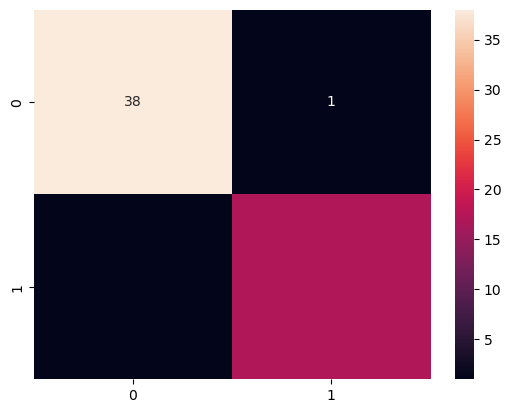

In [53]:
# Heatmap
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

## 4. USING THE K-NN ON CLASSIFICATION MODEL

In [54]:
# Scaling The Dataset
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x= st_x.fit_transform(x)

In [55]:
#importing liabery
from sklearn.neighbors import KNeighborsRegressor

In [56]:
#Tuning The Parameters
parameters = {'n_neighbors': range(30),
              'metric':['manhattan','euclidean']}        
c = KNeighborsRegressor()  
grid = GridSearchCV(c, parameters, cv=5)
grid.fit(x,y)
print("Best Parameters:",grid.best_params_)
print("Best Estimators:",grid.best_estimator_)
print("Best Score:",grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 2}
Best Estimators: KNeighborsRegressor(metric='manhattan', n_neighbors=2)
Best Score: 0.8688563481494486


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neighbors\_regression.py", line 215, in fit
    self._validate_params()
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn

In [ ]:
# the Best Estimators was accurate in this case too.